## Import libraries

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

Let's read the file, here I'm using file from my drive so I've to mount my drive and access the file first.

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


We can access the csv file now.

In [5]:
train = pd.read_csv("/content/drive/My Drive/Data Science/Job Change DS/aug_train.csv")
test = pd.read_csv("/content/drive/My Drive/Data Science/Job Change DS/aug_test.csv")

Let's make a copy of this dataset because I don't want to lose the original data

In [6]:
train_copy = train.copy()
test_copy = test.copy()

Let's visualize the data

In [7]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Let's see which gender is likely to move out of the company.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


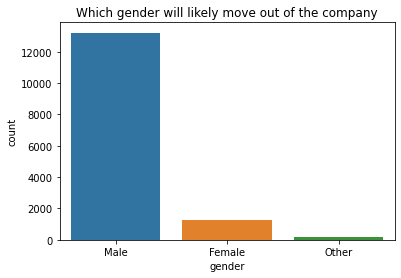

In [8]:
plt.title('Which gender will likely move out of the company')
sns.countplot(train['gender'])
plt.show()

Text(0.5, 1.0, 'Gender % who are looking for new job')

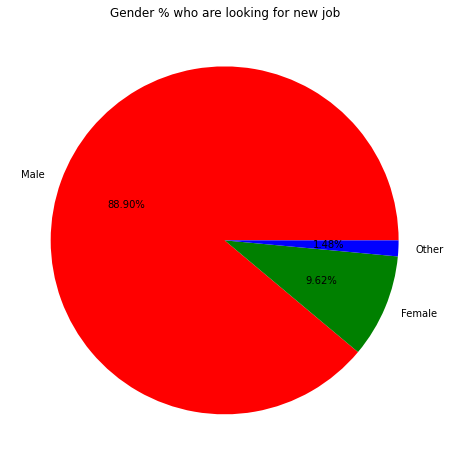

In [17]:
gender = train[train['target'] == 1]['gender']

gender_temp = gender.value_counts()
labels = gender_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = gender_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%")

plt.title('Gender % who are looking for new job')

We can see male percentage is large, mostly men are looking for a job.

Let's check from which company people are leaving and looking for a job the most

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


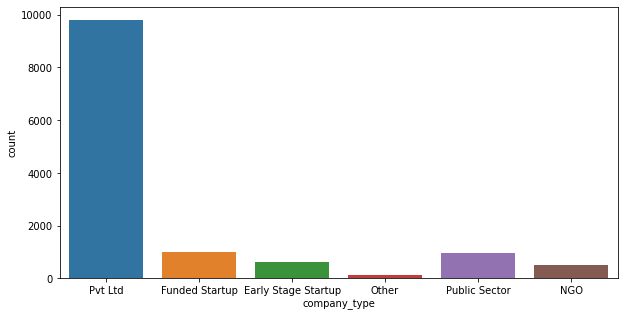

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(train['company_type'])
plt.show()

Text(0.5, 1.0, 'People percentage leaving the company')

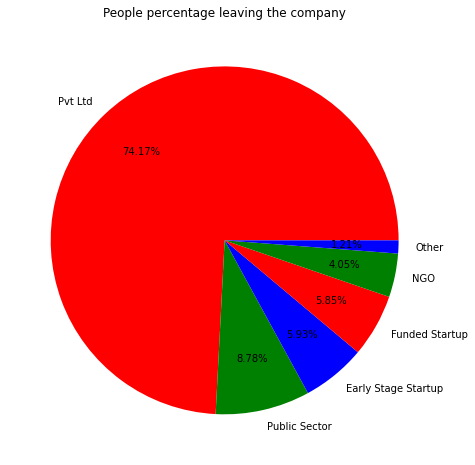

In [19]:
company = train[train['target'] == 1]['company_type']

company_temp = company.value_counts()
labels = company_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = company_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('People percentage leaving the company')

Let's check relevant experience of the target

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


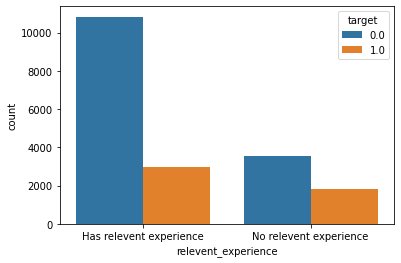

In [20]:
sns.countplot(train['relevent_experience'], hue=train['target'])

Distribution of categorical cols vs target

In [21]:
categorical_cols_to_distribute = ['enrolled_university', 'education_level', 'major_discipline', 'experience', 
                                  'company_size', 'company_type', 'last_new_job']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


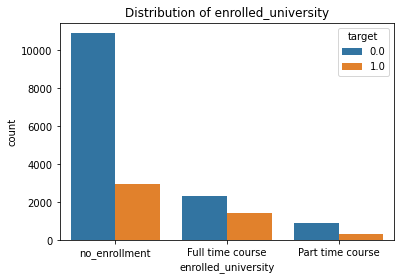

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


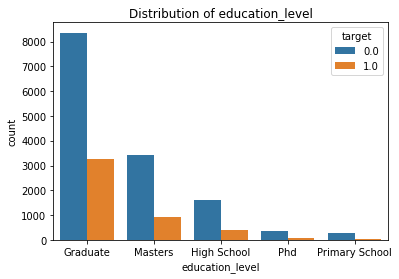

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


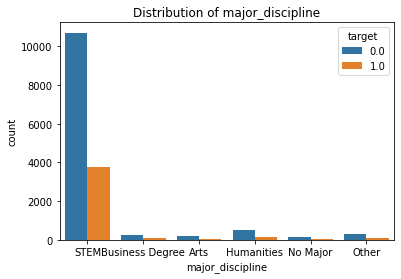

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


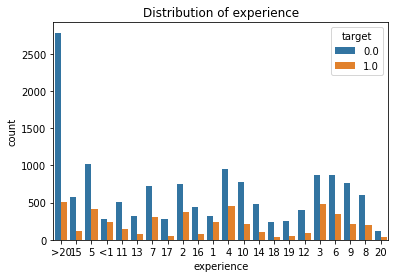

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


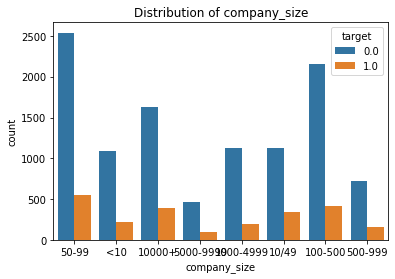

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


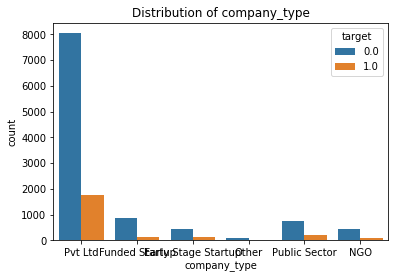

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


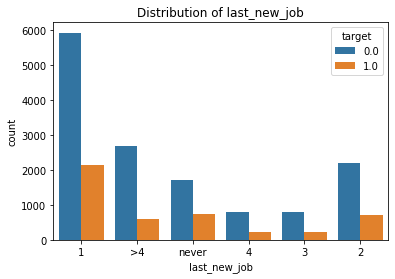

In [22]:
for col in train[categorical_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.countplot(train[col], hue=train['target'])
    plt.show()

In [23]:
numeric_cols_to_distribute = ['city_development_index', 'training_hours']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


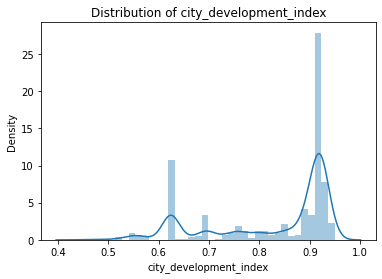

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


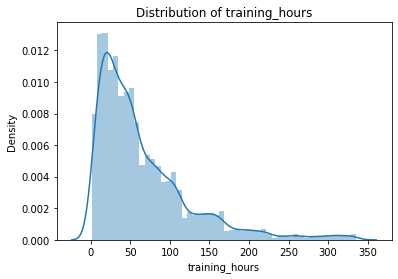

In [24]:
for col in train[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(train[col])
    plt.show()

## Let's do Data Processing

first let's drop the unnecessary columns

In [25]:
train.drop(['enrollee_id', 'city'], axis=1, inplace=True)
test.drop(['enrollee_id', 'city'], axis=1, inplace=True)

Let's fill the missing values with their mode

In [26]:
cols_with_na = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 
                'company_size', 'company_type', 'last_new_job']

In [27]:
for col in cols_with_na:
    train[col].fillna(train[col].mode()[0],inplace=True)

In [28]:
for col in cols_with_na:
    test[col].fillna(test[col].mode()[0],inplace=True)

Now let's change categorical features to numeric features so we can use dictionary mapping

In [29]:
train.select_dtypes(object)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...
19153,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1
19154,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4
19155,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2


In [30]:
train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [31]:
gender_mapping = {'Male':0, 'Female':1, 'Other':2}
relevent_experience_mapping = {'No relevent experience':0, 'Has relevent experience':1}
enrolled_university_mapping = {'no_enrollment':0, 'Full time course':1, 'Part time course':2}
education_level_mapping = {'Graduate':0, 'Masters':1, 'High School':2, 'Phd':3, 'Primary School':4}
major_discipline_mapping = {'STEM':0, 'Business Degree':1, 'Arts':2, 'Humanities':3, 'No Major':4, 'Other':5}
experience_mapping = {'15':15, '5':5, '<1':0, '>20':21, '11':11, '13':13, '7':7, '17':17, '2':2, '16':16,
                      '1':1, '4':4,'10':10, '14':14, '18':18, '19':19, '12':12, '3':3, '6':6, '9':9,
                      '8':8, '20':20}
company_size_mapping = {'50-99':0, '<10':1, '10000+':2, '5000-9999':3, '1000-4999':4, '10/49':5, 
                        '100-500':6, '500-999':7}
company_type_mapping = {'Pvt Ltd':0, 'Funded Startup':1, 'Early Stage Startup':2, 'Other':3, 
                        'Public Sector':4, 'NGO':5}
last_new_job_mapping = {'>4':5, 'never':0, '4':4, '1':1, '3':3, '2':2}

In [32]:
train['gender'] = train['gender'].map(gender_mapping)
train['relevent_experience'] = train['relevent_experience'].map(relevent_experience_mapping)
train['enrolled_university'] = train['enrolled_university'].map(enrolled_university_mapping)
train['education_level'] = train['education_level'].map(education_level_mapping)
train['major_discipline'] = train['major_discipline'].map(major_discipline_mapping)
train['experience'] = train['experience'].map(experience_mapping)
train['company_size'] = train['company_size'].map(company_size_mapping)
train['company_type'] = train['company_type'].map(company_type_mapping)
train['last_new_job'] = train['last_new_job'].map(last_new_job_mapping)

In [33]:
test['gender'] = test['gender'].map(gender_mapping)
test['relevent_experience'] = test['relevent_experience'].map(relevent_experience_mapping)
test['enrolled_university'] = test['enrolled_university'].map(enrolled_university_mapping)
test['education_level'] = test['education_level'].map(education_level_mapping)
test['major_discipline'] = test['major_discipline'].map(major_discipline_mapping)
test['experience'] = test['experience'].map(experience_mapping)
test['company_size'] = test['company_size'].map(company_size_mapping)
test['company_type'] = test['company_type'].map(company_type_mapping)
test['last_new_job'] = test['last_new_job'].map(last_new_job_mapping)

Let's define the independent and dependent variables

In [45]:
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test

Let's check for imbalance in the data and balance it with smote

In [35]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


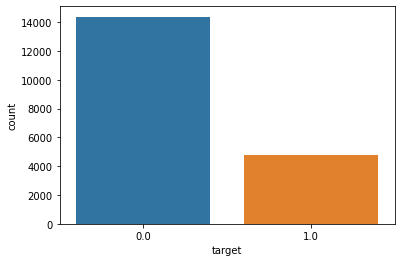

In [36]:
sns.countplot(y_train)

Clearly 0.0 is greater then 1.0 - let's fix this by balancing them

In [37]:
smote = SMOTE(random_state=56)

x_train, y_train = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


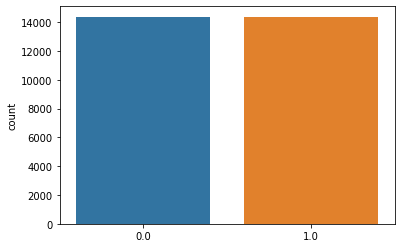

In [38]:
sns.countplot(y_train)

Now the numbers are equally balanced

## Model Building and training

In [39]:
from xgboost import XGBClassifier

In [40]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Accuracy

In [43]:
model.score(x_train, y_train)

0.8323134691606981

## Happy Coding
# **A R**